# Importing packages

In [1]:
import gcsfs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cftime
from sklearn.linear_model import LinearRegression

In [2]:
!pip install piecewise-regression

  Using cached piecewise_regression-1.3.0-py3-none-any.whl (22 kB)


In [3]:
import piecewise_regression as pr

# Load data

In [4]:
dqdz = np.load('./variables/dqdz.npy')

In [5]:
wq = np.load('./variables/wq.npy')

In [6]:
dqdz_stand = np.load('./variables/dqdz_stand.npy')

In [7]:
wq_stand = np.load('./variables/wq_stand.npy')

In [8]:
dqdz.shape,wq.shape
dqdz2 = dqdz.transpose(1,0,2)
wq2 = wq.transpose(1,0,2)

### Data preprocess

In [9]:
#squeeze takes out dimensions with one in them
np.squeeze(dqdz).shape, np.squeeze(wq_stand).shape

((47, 2232), (2232, 47))

# Create training data

In [10]:
#take out column dimension
x = np.squeeze(dqdz)
y = np.squeeze(wq)

x_norm = np.squeeze(dqdz_stand)
y_norm = np.squeeze(wq_stand)


In [11]:
#create testing/training data for non-normalized data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x.transpose(1,0), y.transpose(1,0), test_size=0.33, random_state=42)

In [12]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((1495, 47), (737, 47), (1495, 47), (737, 47))

In [13]:
#create testing/training data for normalized data
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm, y_norm, test_size=0.33, random_state=42)

In [14]:
X_train_norm.shape,X_test_norm.shape, y_train_norm.shape, y_test_norm.shape

((1495, 47), (737, 47), (1495, 47), (737, 47))

## SR for one layer


                    Breakpoint Regression Results                     
No. Observations                     1495
No. Model Parameters                    8
Degrees of Freedom                   1487
Res. Sum of Squares           2.13992e-08
Total Sum of Squares          2.89908e-08
R Squared                        0.261864
Adjusted R Squared               0.257891
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const           -3.47887e-06     3.29e-06      -1.0562         0.291    -9.94e-06   2.9823e-06
alpha1              -2.99935        0.862      -3.4815      0.000513      -4.6893      -1.3094
beta1                1.33231        0.903       1.4759             -     -0.43845       3.1031
beta2                 11.687        0.864       13.524             -       9.9919       13.382
beta3            

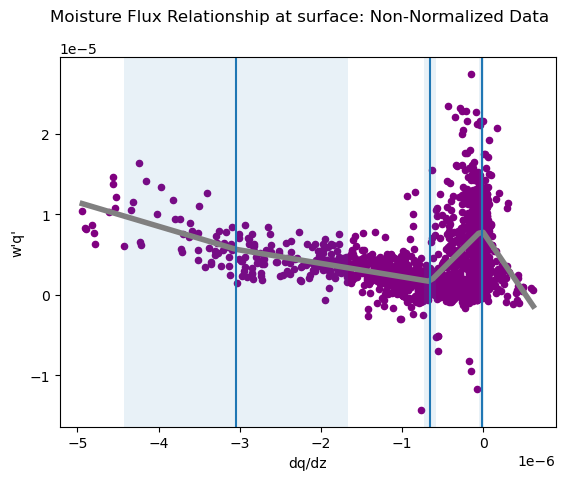

In [15]:
#run segmented regression once for surface layer
pw_fit = pr.Fit(X_train[:,46], y_train[:,46], n_breakpoints=3)
pw_fit.summary()
# Plot the data, fit, breakpoints and confidence intervals
pw_fit.plot_data(color="purple", s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="grey", linewidth=4)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("dq/dz")
plt.ylabel("w'q'")
plt.suptitle(f'Moisture Flux Relationship at surface: Non-Normalized Data')
plt.show()
plt.close()

## SR for lowest three layers


                    Breakpoint Regression Results                     
No. Observations                     1495
No. Model Parameters                    4
Degrees of Freedom                   1491
Res. Sum of Squares            8.1114e-08
Total Sum of Squares          1.18892e-07
R Squared                        0.317748
Adjusted R Squared               0.315916
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const            2.21097e-06     5.94e-07       3.7251      0.000203   1.0467e-06   3.3752e-06
alpha1             -0.703693        0.509      -1.3826         0.167       -1.702      0.29464
beta1                44.3341          3.1       14.314             -       38.259        50.41
breakpoint1     -2.87898e-07     1.89e-08            -             -  -3.2493e-07  -2.5086e-07
-----------------

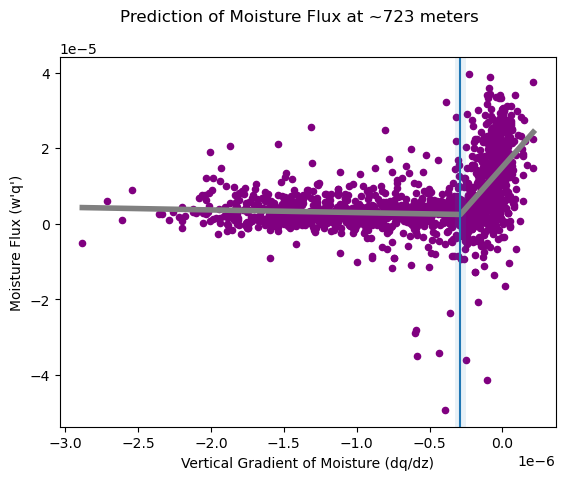


                    Breakpoint Regression Results                     
No. Observations                     1495
No. Model Parameters                    4
Degrees of Freedom                   1491
Res. Sum of Squares           5.13272e-08
Total Sum of Squares          6.65347e-08
R Squared                        0.228564
Adjusted R Squared               0.226493
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const            2.85384e-07     5.89e-07       0.4846         0.628  -8.6979e-07   1.4406e-06
alpha1              -2.61502        0.465      -5.6269      2.19e-08      -3.5266      -1.7034
beta1                16.7378         1.21       13.827             -       14.363       19.112
breakpoint1     -5.66397e-07     3.91e-08            -             -  -6.4316e-07  -4.8963e-07
-----------------

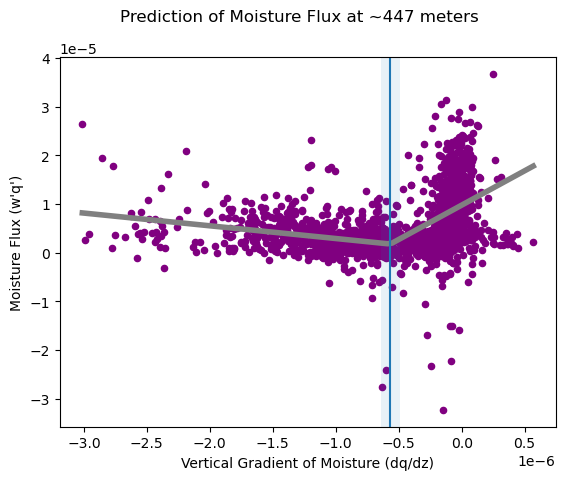


                    Breakpoint Regression Results                     
No. Observations                     1495
No. Model Parameters                    4
Degrees of Freedom                   1491
Res. Sum of Squares           2.36829e-08
Total Sum of Squares          2.89908e-08
R Squared                        0.183091
Adjusted R Squared               0.180898
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const             4.1951e-07     3.84e-07       1.0915         0.275  -3.3438e-07   1.1734e-06
alpha1              -1.86893        0.192      -9.7443      8.58e-22      -2.2452      -1.4927
beta1                7.94739        0.532       14.943             -       6.9042       8.9906
breakpoint1     -8.22703e-07     5.33e-08            -             -  -9.2724e-07  -7.1817e-07
-----------------

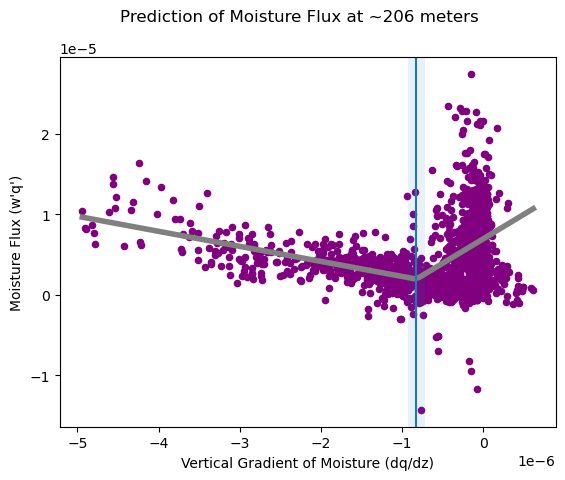

In [16]:
#plotting non normalized data on one and normalized on the other
for lev in range(44,47):
    #running model
    pw_fit = pr.Fit(X_train[:,lev], y_train[:,lev], n_breakpoints=1)
    pw_fit.summary()
    
    #plotting
    pw_fit.plot_data(color="purple", s=20)
    pw_fit.plot_fit(color="grey", linewidth=4)
    pw_fit.plot_breakpoints()
    pw_fit.plot_breakpoint_confidence_intervals()
    plt.xlabel("Vertical Gradient of Moisture (dq/dz)")
    plt.ylabel("Moisture Flux (w'q')")
    
    if lev == 44:
        plt.suptitle(f"Prediction of Moisture Flux at ~723 meters")
    elif lev == 45:
        plt.suptitle(f"Prediction of Moisture Flux at ~447 meters")
    elif lev == 46:
        plt.suptitle(f"Prediction of Moisture Flux at ~206 meters")
        
    plt.show()
    plt.close()

### random code for trying other things out

In [37]:
# #trying piecewise regression for normalized data
# for lev in range(42,47):
#     #pw_fit = pr.Fit(X_train[:,lev], y_train[:,lev], n_breakpoints=1)
#     pw_fit_norm = pr.Fit(X_train_norm[:,lev], y_train_norm[:,lev], n_breakpoints=3)
    
#     pw_fit_norm.plot_data(color="grey", s=20)
# # Pass in standard matplotlib keywords to control any of the plots
#     pw_fit_norm.plot_fit(color="red", linewidth=4)
#     pw_fit_norm.plot_breakpoints()
#     pw_fit_norm.plot_breakpoint_confidence_intervals()
#     plt.xlabel("dq/dz")
#     plt.ylabel("w'q'")
#     plt.suptitle(f'Relationship between dq/dz and moisture flux at level {lev} with normalized data')
#     plt.show()
#     plt.close()

In [ ]:
#creating training data
# #takes first 1998 time samples
# xtrain = x[:,:1998]
# ytrain = y[:,:1998]

# xtrain_norm = x_norm[:1998,]
# ytrain_norm = y_norm[:1998,]


# xtrain.shape, ytrain.shape, xtrain_norm.shape, ytrain_norm.shape

In [ ]:
# #plotting non normalized data on one and normalized on the other
# for lev in range(0,47):
#     x_train = xtrain[lev,:]
#     y_train = ytrain[lev,:]
    
#     x_train_norm = xtrain_norm[:,lev]
#     y_train_norm = ytrain_norm[:,lev]
    
#     fig, ax = plt.subplots(ncols = 2, figsize = (12,6))
#     ax[0].scatter(x_train, y_train)
#     ax[0].set_xlabel("dq/dz")
#     ax[0].set_ylabel("w'q'")
    
#     ax[1].scatter(x_train_norm, y_train_norm)
#     ax[1].set_xlabel("dq/dz")
#     ax[1].set_ylabel("w'q'")
    
#     if lev == 46:
#         ax[0].set_title(f'Moisture flux relationship at Surface')
#         ax[1].set_title(f'Moisture flux relationship at Surface for normalized data')
#     else:
#         ax[0].set_title(f'Moisture flux relationship at level {lev}')
#         ax[1].set_title(f'Moisture flux relationship at level {lev} for normalized data')
        
    

In [ ]:
# #plotting non normalized data on one and normalized on the other on sklearn datasplit
# for lev in range(42,47):
#     xtrain = X_train[:,lev]
#     ytrain = y_train[:,lev]
    
#     xtrain_norm = X_train_norm[:,lev]
#     ytrain_norm = y_train_norm[:,lev]

#     fig, ax = plt.subplots(ncols = 2, figsize = (12,6))
#     ax[0].scatter(xtrain, ytrain)
#     ax[0].set_xlabel("dq/dz")
#     ax[0].set_ylabel("w'q'")
#     ax[0].plot( X_test[:,lev],y_prediction[:,lev], color = "red")
    
#     ax[1].scatter(xtrain_norm, ytrain_norm)
#     ax[1].set_xlabel("dq/dz")
#     ax[1].set_ylabel("w'q'")
#     ax[1].plot(X_test_norm[:,lev],y_prediction_norm[:,lev], color = "red")
    
#     if lev == 46:
#         ax[0].set_title(f'Moisture flux relationship at Surface')
#         ax[1].set_title(f'Moisture flux relationship at Surface for normalized data')
#     else:
#         ax[0].set_title(f'Moisture flux relationship at level {lev}')
#         ax[1].set_title(f'Moisture flux relationship at level {lev} for normalized data')

In [69]:
# #create model for normalized data
# model = LinearRegression()  #initiate linear regression
# model.fit(X_train_norm, y_train_norm)  #fit the linear regression model to the dataset
# model.coef_  #get the slope of the line
# model.intercept_  #get the y-int of the line
# y_prediction_norm = model.predict(X_test_norm)  #predict the y's based on the test data (using coef and intercept)

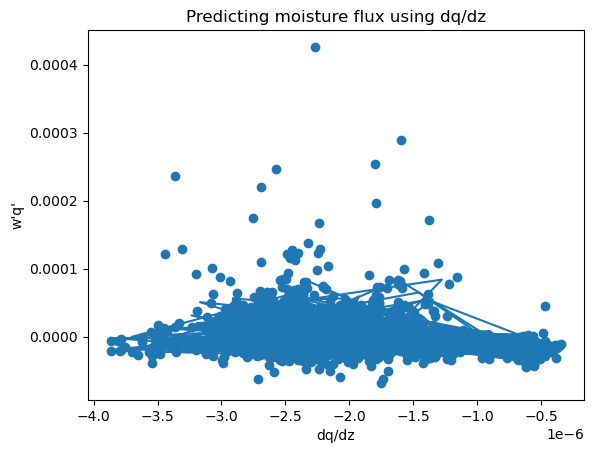

In [80]:
#plot and predictions
fig, ax = plt.subplots()
ax.scatter(X_train[:,26], y_train[:,26])
ax.set_xlabel("dq/dz")
ax.set_ylabel("w'q'")
ax.set_title("Predicting moisture flux using dq/dz")
plt.plot(X_test[:,26],y_prediction[:,26])
#ax.legend()

In [56]:
# #create model for non-normalized data
# model = LinearRegression()  #initiate linear regression
# model.fit(X_train, y_train)  #fit the linear regression model to the dataset
# model.coef_  #get the slope of the line
# model.intercept_  #get the y-int of the line
# y_prediction = model.predict(X_test)  #predict the y's based on the test data (using coef and intercept)

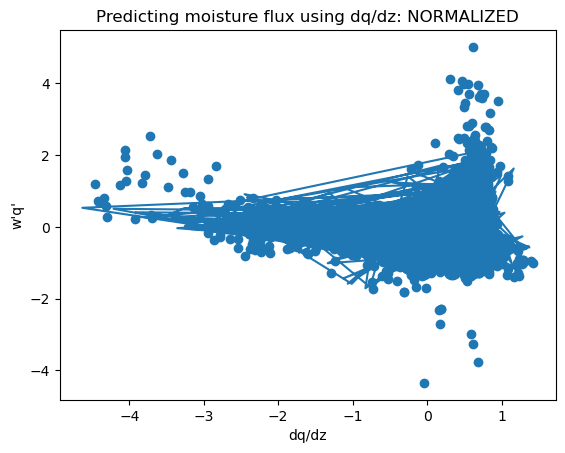

In [104]:
#plot and predictions
fig, ax = plt.subplots()
ax.scatter(X_train_norm[:,46], y_train_norm[:,46])
ax.set_xlabel("dq/dz")
ax.set_ylabel("w'q'")
ax.set_title("Predicting moisture flux using dq/dz: NORMALIZED")
plt.plot(X_test_norm[:,46],y_prediction_norm[:,46])
#ax.legend()

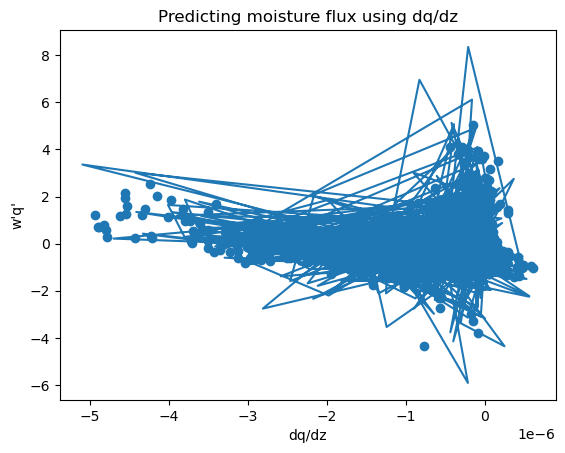

In [117]:
fig, ax = plt.subplots()
ax.scatter(X_train[:,46], y_train[:,46])
ax.set_xlabel("dq/dz")
ax.set_ylabel("w'q'")
ax.set_title("Predicting moisture flux using dq/dz")
plt.plot(X_test[:,46],test_predictions[:,46])
#ax.legend()

In [99]:
model.score(X_train,y_train)

-294941.6773608936

In [100]:
model.score(X_train_norm, y_train_norm)

0.40254833642033894